In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
#PREPROCESS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/content/drive/MyDrive/muskanchughani/data.csv'
data = pd.read_csv(file_path)

# Drop the 'id' column
data = data.drop(columns=['id','Unnamed: 32'])
data.head(10)
missing_values = data.isna().sum()
print(missing_values)


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [72]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/muskanchughani/CustomerChurn.csv'
data = pd.read_csv(file_path)

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Print the categorical columns
print("Categorical columns in the dataset:")
print(categorical_columns)


Categorical columns in the dataset:
Index(['Customer ID', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Total Charges', ' Churn'],
      dtype='object')


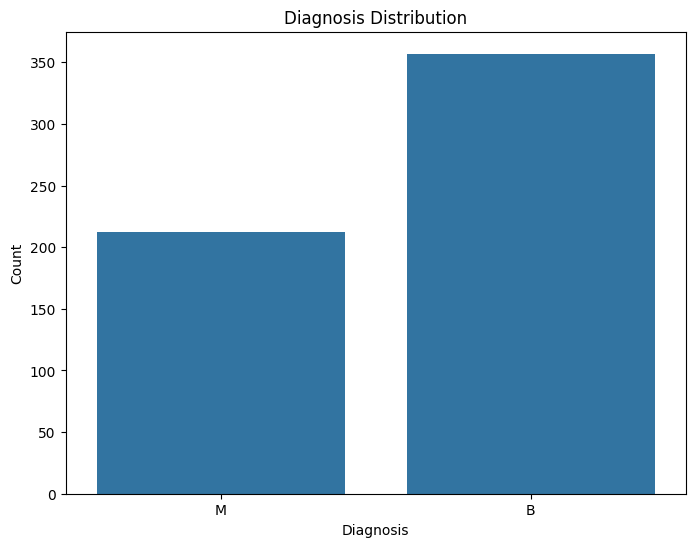

In [57]:
# Load original data to access the original 'diagnosis' column
original_data = pd.read_csv(file_path)

# Bar graph for the 'diagnosis' column
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=original_data)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [58]:
missing_values = data.isna().sum()
print(missing_values)
# Convert categorical columns (e.g., 'diagnosis') to numerical using label encoding
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Split the data into features and target
X = data.drop(columns=['diagnosis'])  # Assuming 'diagnosis' is the target column
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Apply each model and store results
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy

    # Print results
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("\n")

# Summary of accuracy scores
print("Summary of Accuracy Scores:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
--- Random Forest ---
Accuracy: 0.9708
Confusion Matrix:
[[107   1]
 [  4  59]]
Classifi

In [70]:
print("Class distribution in training set:")
print(y_train.value_counts())


Class distribution in training set:
diagnosis
B    249
M    149
Name: count, dtype: int64


In [71]:
# Split the data into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using RFE with RandomForestClassifier
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected features:")
print(selected_features)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}
#baseline performance for imbalance data
# Apply each model and store results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_rfe, y_train)

    # Make predictions
    predictions = model.predict(X_test_rfe)

    # Print results
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("\n")

Selected features:
Index(['area_mean', 'concavity_mean', 'concave points_mean', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')
--- Random Forest ---
Confusion Matrix:
[[106   2]
 [  4  59]]
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



--- Decision Tree ---
Confusion Matrix:
[[103   5]
 [  4  59]]
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.95      0.96       108
           M       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94 

In [68]:
# Check class distribution in training data
print("Class distribution in training set:")
print(y_train.value_counts())


Class distribution in training set:
diagnosis
B    249
M    149
Name: count, dtype: int64


Selected features:
Index(['area_mean', 'concavity_mean', 'concave points_mean', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


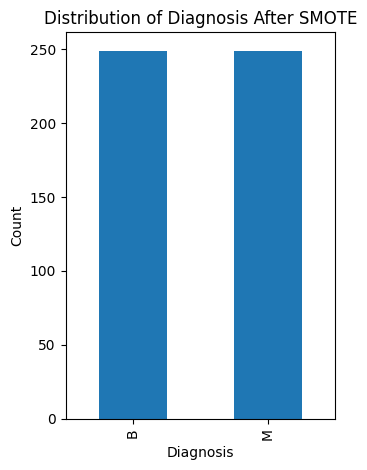

--- Random Forest ---
Confusion Matrix:
[[106   2]
 [  2  61]]
Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



--- Decision Tree ---
Confusion Matrix:
[[95 13]
 [ 3 60]]
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.88      0.92       108
           M       0.82      0.95      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.90       171
weighted avg       0.92      0.91      0.91       171



--- Logistic Regression ---
Confusion Matrix:
[[105   3]
 [  1  62]]
Classification Report:
              precision    recall  f1-score   support

           B       0.99    

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE



X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using RFE with RandomForestClassifier
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected features:")
print(selected_features)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rfe, y_train)

# Plot the distribution after SMOTE
plt.subplot(1, 2, 2)
pd.Series(y_train_resampled).value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis After SMOTE')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Apply each model and store results
for model_name, model in models.items():
    # Train the model with resampled data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    predictions = model.predict(X_test_rfe)

    # Print results
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("\n")